<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Дмитрий, доброго дня! рад приветствовать тебя опять) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>
    </div>

<div class="alert alert-block alert-info">
    
**Приветствую, Николай!**
    
Спасибо за оперативный ответ!
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Привет, Дмитрий! Так сложилось, что и товй проект и комп и я оказались в единой точке:)
    </div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import warnings
warnings.simplefilter('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('/datasets/autos.csv')
display(df.info())
display(df.describe())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


* Данные представляют из себя таблицу 16 столбцов 354369 строк
* Имеются пропуски в столбцах `VehicleType`, `Gearbox`, `Model`, `FuelType`, `NotRepaired`. Т.к. `Model` для определения стоимости знать критично, придется удались строки без этих данных, к тому же их менее 10%
* Типы кроме дат соответствуют

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Ок, данные на базе)
    </div>

In [4]:
df = df.dropna(subset=['Model']).reset_index(drop=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>понятно. С категориаьными факторами, т.е. пропусками в них: действиетльно, подчас непросто их заполнить. И выход - подстановка новой категории "неизвестно" ("другое") видится оправданным. Или удалить)
    </div>

In [5]:
list_to_datetime = ['DateCrawled', 'DateCreated', 'LastSeen']
df[list_to_datetime] = df[list_to_datetime].apply(pd.to_datetime)
display(df[list_to_datetime].describe())

,DateCrawled,DateCreated,LastSeen
count,334664,334664,334664
unique,260117,108,171371
top,2016-03-24 14:49:47,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,6,13000,17
first,2016-03-05 14:06:22,2014-03-10 00:00:00,2016-03-05 14:15:08
last,2016-04-07 14:36:58,2016-04-07 00:00:00,2016-04-07 14:58:51


Проверим мультиколлинеарность (она отсутствует)

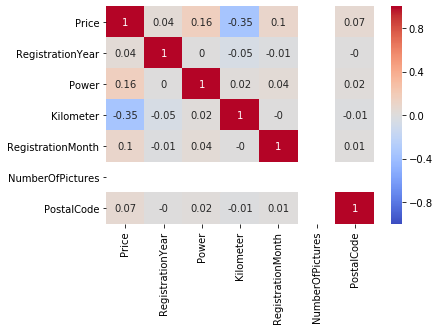

In [6]:
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot=True)
plt.show()

* Странный столбец `NumberOfPictures`. Состоит только из нулевых значений. Избавимся от него. Также бессммыслено держать столбцец с датой скачивания анкеты из базы. 
* Еще вызывает вопрос адекватность поиска зависимости цены от даты заполнения анкеты и последней активности пользователя. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66374f30d0>]],
      dtype=object)

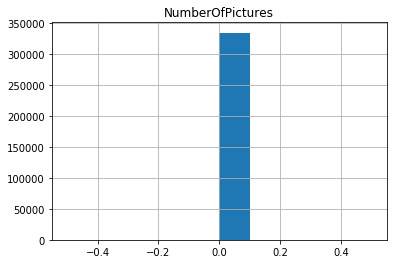

In [7]:
df.hist('NumberOfPictures')

In [8]:
df = df.drop(['NumberOfPictures', 'DateCrawled', 'DateCreated', 'LastSeen'], axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>с дропом - ОК. Кстати говоря, фактор "PostCode" - тоже можно удалить. Это просто набор цифр в данной интерпретации. Слишком много категоий получается. Можно, правда, попробовать оставить 1-2 первые цифры от почнового кода... тогда категорий будет меньше. И для модели - уже интереснее..
    </div>

* Рассмотрим столбец `NotRepaired` и заменим все NaN на no, т.е. предположим, что те кто не указывал этот параметр машину не ремонтировал. Вообще можно обратить внимание, что мало кто указал, что машина ремонтная

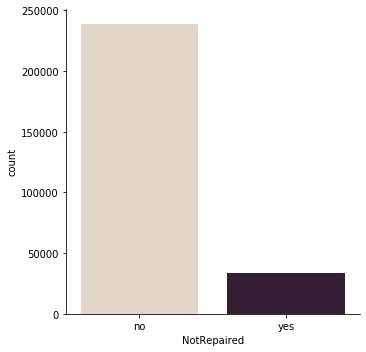

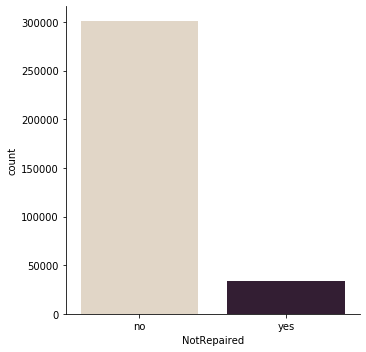

In [9]:
sns.catplot(x='NotRepaired', kind='count', palette="ch:.25", data=df)
df['NotRepaired'][df['NotRepaired'].isna()] = 'no'
sns.catplot(x='NotRepaired', kind='count', palette="ch:.25", data=df)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Предположение понятно. Но ононе аргументированное, просто на предположении. А значит, мы можем и ошибиться. И на выходе можем иметь бОльшую, ошибку.
    </div>

* Также вопросы вызывают столбцы `RegistrationYear` и `RegistrationMonth`. Год регистрации не может быть больше, чем дата создания анкеты. Также есть чрезмерные "раритеты". Отбросим всё что меньше $Q1-1.5*IQR$ и больше 2016 года
* В месяц попали нулевые значения. Судя по распределению, кто-то не заботился ставить месяц, поэтому тут нули

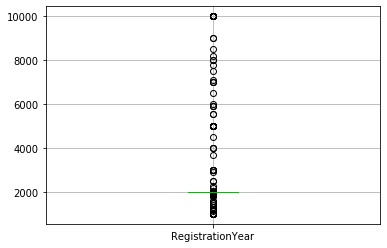

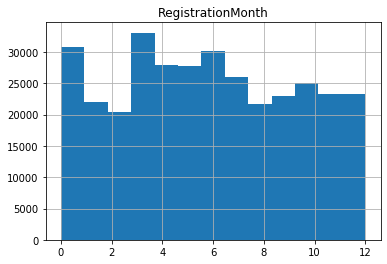

In [10]:
df.boxplot('RegistrationYear')
plt.show()
df.hist('RegistrationMonth', bins=13)
plt.show()

In [11]:
IQR_RY = df['RegistrationYear'].quantile(0.75) - df['RegistrationYear'].quantile(0.25)
RY_min = df['RegistrationYear'].quantile(0.25) - 1.5 * IQR_RY
print(IQR_RY, RY_min)

9.0 1985.5


In [12]:
df_prepared = df.drop(df[(df['RegistrationYear']<RY_min)|
                         (df['RegistrationYear']>2016)|
                         ((df['RegistrationYear']==2016)&
                          (df['RegistrationMonth']>4))].index).reset_index()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОК, тут здорово раскрутил. 
    </div>

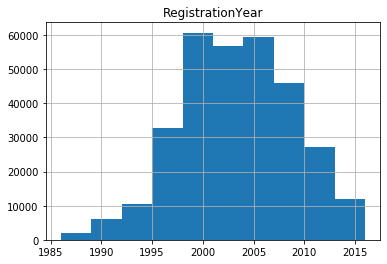

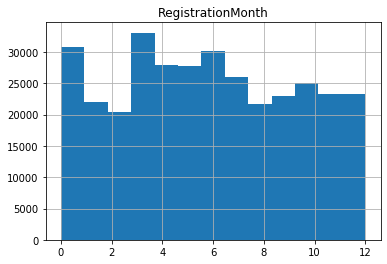

In [13]:
df_prepared.hist('RegistrationYear')
df.hist('RegistrationMonth', bins=13)
plt.show()

* Теперь рассмотрим численные признаки: мощность и пробег
* Очевидно, что некоторые указывали мощность не в л.с., а возможно в Ваттах или еще в чем-то. Согласно инттернету самый мощный серийный авто - 630 л.с. - все что больше заменим на медиану по модели
* Также есть проблема нулевых значений мощности. Их также заменим медианными значениями для каждой модели
* Пробег на первый взгляд не вызывает вопросов

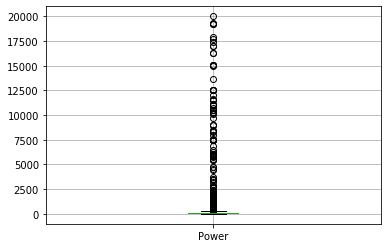

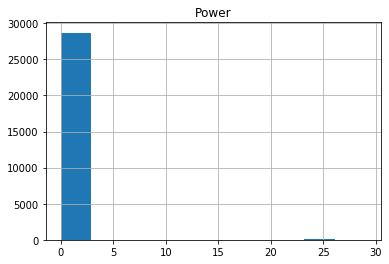

In [14]:
df_prepared.boxplot('Power')
df_prepared[df_prepared['Power']<30].hist('Power')
power_pivot = df.drop(df[(df['Power']==0)].index).pivot_table(index=['Brand', 'Model'],
                                          values='Power',
                                          aggfunc='median')
def replace_power_by_meadian(row):
    global power_pivot
    row.Power = power_pivot.loc[row.Brand, row.Model].values[0]
    return row
df_prepared[df_prepared['Power']==0] = (df_prepared[df_prepared['Power']==0]
                                        .apply(replace_power_by_meadian, axis=1))


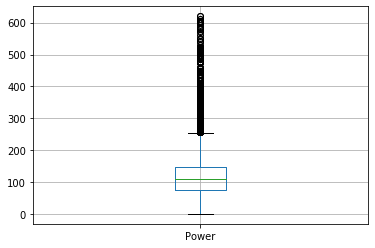

In [15]:
df_prepared[df_prepared['Power']>630] = (df_prepared[df_prepared['Power']>630]
                                        .apply(replace_power_by_meadian, axis=1))
df_prepared.boxplot('Power')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6636bb2ad0>]],
      dtype=object)

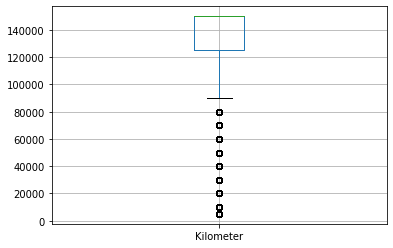

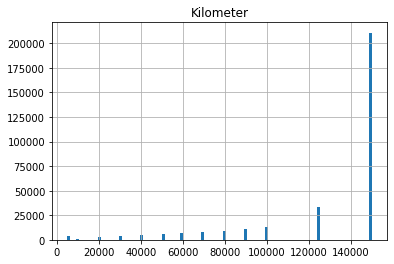

In [16]:
df_prepared.boxplot('Kilometer')
df_prepared.hist('Kilometer', bins=100)

* Целевой признак цены тоже вызыывает пару вопросов: во-первых много нулевых значений - отних мы просто избавимся; во-вторых есть очень маленькие цены
* Построив гистограмму без нулевых значений видно, что после 1000 евро распределение цен начинает менять тренд. Поэтому попробуем разделись выборку на дешевые и остальные

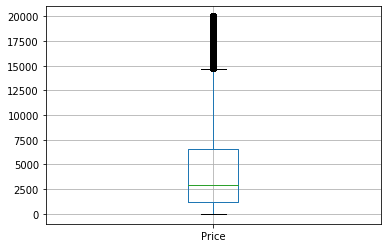

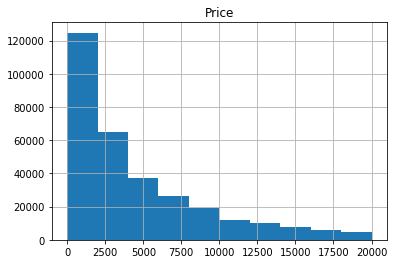

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f663a3f1690>]],
      dtype=object)

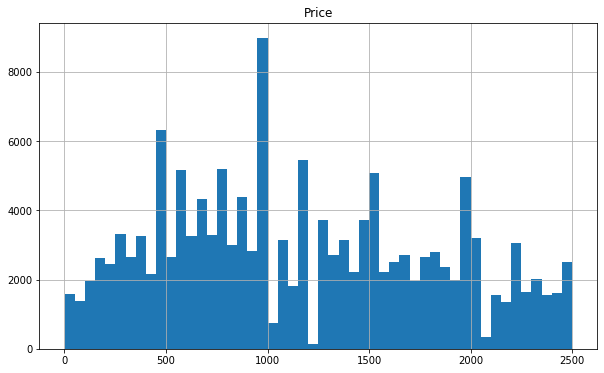

In [17]:
df_prepared.boxplot('Price')
plt.show()
df_prepared.hist('Price')
plt.show()
df_prepared = df.drop(df[(df['Price']==0)].index).reset_index(drop=True)
df_prepared[(df_prepared['Price']<2500)].hist('Price', bins=50, figsize=(10, 6))

In [18]:
IQR_PR = df_prepared['Price'].quantile(0.75) - df_prepared['Price'].quantile(0.25)
PR_max = df_prepared['Price'].quantile(0.75) + 1.5 * IQR_PR
print(IQR_PR, PR_max)

5442.25 14805.625


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Есть таой ещё подход для работы с количественными данными: совместно со статистическим анализом проводить бизнес-анализ данных. Т.е. подключать понимание рынка и на этом понимании устанавливать отсечки. И также,оставлять ссылки на источник знаний по границам отсечек, чтобы это не выглядело, будто бы решение принимал аналитик исключительно от себя).<br>
    
Интересный может быть доп.фактор - сегменты авто)
    </div>

In [19]:
df_prepared_expensive = df_prepared.drop(df_prepared[(df_prepared['Price']<PR_max)].index).reset_index(drop=True)
print(df_prepared_expensive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586 entries, 0 to 16585
Data columns (total 12 columns):
Price                16586 non-null int64
VehicleType          16145 non-null object
RegistrationYear     16586 non-null int64
Gearbox              16380 non-null object
Power                16586 non-null int64
Model                16586 non-null object
Kilometer            16586 non-null int64
RegistrationMonth    16586 non-null int64
FuelType             16194 non-null object
Brand                16586 non-null object
NotRepaired          16586 non-null object
PostalCode           16586 non-null int64
dtypes: int64(6), object(6)
memory usage: 1.5+ MB
None


In [20]:
df_prepared_med = df_prepared.drop(df_prepared[(df_prepared['Price']<=500)|
                                               (df_prepared['Price']>=PR_max)].index).reset_index(drop=True)
print(df_prepared_med.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281833 entries, 0 to 281832
Data columns (total 12 columns):
Price                281833 non-null int64
VehicleType          260177 non-null object
RegistrationYear     281833 non-null int64
Gearbox              271156 non-null object
Power                281833 non-null int64
Model                281833 non-null object
Kilometer            281833 non-null int64
RegistrationMonth    281833 non-null int64
FuelType             264083 non-null object
Brand                281833 non-null object
NotRepaired          281833 non-null object
PostalCode           281833 non-null int64
dtypes: int64(6), object(6)
memory usage: 25.8+ MB
None


In [21]:
df_prepared_cheap = df_prepared.drop(df_prepared[(df_prepared['Price']>500)].index).reset_index(drop=True)
print(df_prepared_cheap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27657 entries, 0 to 27656
Data columns (total 12 columns):
Price                27657 non-null int64
VehicleType          21588 non-null object
RegistrationYear     27657 non-null int64
Gearbox              24270 non-null object
Power                27657 non-null int64
Model                27657 non-null object
Kilometer            27657 non-null int64
RegistrationMonth    27657 non-null int64
FuelType             22248 non-null object
Brand                27657 non-null object
NotRepaired          27657 non-null object
PostalCode           27657 non-null int64
dtypes: int64(6), object(6)
memory usage: 2.5+ MB
None


### Вывод

* Избавились от пропусков в столбце `Model`
* Избавились от столбцов с информацией о дате создания, обновления объявления, т.к. на цену это никак не должно влиять
* Также пришлось избавиться от столбца с количеством фото, т.к. там везде по нулям
* Пропуски в ремонтах заменили на 'no' - распределениесильно не сместилось
* Ограничили год регистрации авто с 1985 по 2016. Таким образом избавились от странных значений. Здесь пользовались методом ящика с усами
* В мощности было много завышенных а также нулевых значений. Заменили их все на медианные показатели по каждой модели
* Дропнули позиции с нулевыми ценами. Также разбили данные на три ценовых категории по ящику с усами (дорогая цена) и визуально по гистограмме (дешевая цена)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Хороший раздел получился. С чем-то я могу и несогласиться, но это это неважно. Важно, что удалось увидеть основные моменты!
    </div>

## Обучение моделей

In [22]:
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired', 'Brand']
df_prepared_med[cat_features] = (df_prepared_med[cat_features]
                                      .where(pd.notnull(df_prepared_med[cat_features]), 'None'))

In [23]:
target = df_prepared_med['Price']
features = df_prepared_med.drop(['Price'] , axis=1)
for feature in cat_features:
    features[feature] = pd.Series(features[feature], dtype="category")
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [24]:
%%time
model_CBR = CatBoostRegressor(iterations=150, depth=12, loss_function="RMSE",verbose=10)
model_CBR.fit(features_train, target_train, cat_features=cat_features, verbose=10)
predictions_valid = model_CBR.predict(features_valid)
print(mean_squared_error(predictions_valid, target_valid) ** 0.5)

0:	learn: 3460.3248149	total: 507ms	remaining: 1m 15s
10:	learn: 2871.1429718	total: 4.6s	remaining: 58.2s
20:	learn: 2464.6030157	total: 8.69s	remaining: 53.4s
30:	learn: 2178.9021310	total: 12.8s	remaining: 49.1s
40:	learn: 1966.0602950	total: 17s	remaining: 45.1s
50:	learn: 1826.7780545	total: 21.2s	remaining: 41.1s
60:	learn: 1722.7980417	total: 25.4s	remaining: 37s
70:	learn: 1653.1423078	total: 29.5s	remaining: 32.8s
80:	learn: 1595.7078320	total: 33.6s	remaining: 28.6s
90:	learn: 1552.8605865	total: 37.7s	remaining: 24.4s
100:	learn: 1521.3814377	total: 41.7s	remaining: 20.3s
110:	learn: 1499.3260750	total: 45.8s	remaining: 16.1s
120:	learn: 1482.8927229	total: 49.9s	remaining: 12s
130:	learn: 1468.9680733	total: 53.9s	remaining: 7.82s
140:	learn: 1457.2399319	total: 58.1s	remaining: 3.71s
149:	learn: 1447.7673000	total: 1m 1s	remaining: 0us
1473.1539750090512
CPU times: user 55.5 s, sys: 6.91 s, total: 1min 2s
Wall time: 1min 3s


In [25]:
%%time
model_LGBMR = LGBMRegressor(max_depth=14, 
                            n_estimators=120, 
                            random_state=12345, 
                            objective='regression',
                            num_leaves=1400,
                            metric='rmse')
model_LGBMR.fit(features_train, target_train, categorical_feature=cat_features, verbose=10)
predictions_valid = model_LGBMR.predict(features_valid, num_iteration=2)
print(mean_squared_error(predictions_valid, target_valid) ** 0.5)

3000.6339802827297
CPU times: user 43.6 s, sys: 201 ms, total: 43.8 s
Wall time: 44.1 s


In [26]:
%%time
model_RFR = RandomForestRegressor(n_estimators=140, max_depth=16, random_state=12345)
model_RFR.fit(features_train.drop(cat_features, axis=1), target_train)
predictions_valid = model_RFR.predict(features_valid.drop(cat_features, axis=1))
print(mean_squared_error(predictions_valid, target_valid) ** 0.5)

1748.5915782547859
CPU times: user 42.1 s, sys: 446 ms, total: 42.6 s
Wall time: 42.6 s


### Вывод

Здесь попытался ограничиться одной минутой для обучения каждой модели. Исходя из этого подбирал гиперпараметры

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>И это удобно! здорово)
    </div>

## Анализ моделей

Проверим наши модели на на тестовой выборке и сравним с DummyRegressor

In [27]:
predictions_test = model_CBR.predict(features_test)
print('RMSE на CatBoostRegressor: {:.0f} euro'
      .format(mean_squared_error(predictions_test, target_test) ** 0.5))

predictions_test = model_LGBMR.predict(features_test)
print('RMSE на LGBMRegressor: {:.0f} euro'
      .format(mean_squared_error(predictions_test, target_test) ** 0.5))

predictions_test = model_RFR.predict(features_test.drop(cat_features, axis=1))
print('RMSE на RandomForestRegressor: {:.0f} euro'
      .format(mean_squared_error(predictions_test, target_test) ** 0.5))

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_test, target_test)
predictions_test = dummy_regr.predict(features_test)
print('RMSE на DummyRegressor mean: {:.0f} euro'
      .format(mean_squared_error(predictions_test, target_test) ** 0.5))

RMSE на CatBoostRegressor: 1489 euro
RMSE на LGBMRegressor: 1318 euro
RMSE на RandomForestRegressor: 1764 euro
RMSE на DummyRegressor mean: 3528 euro


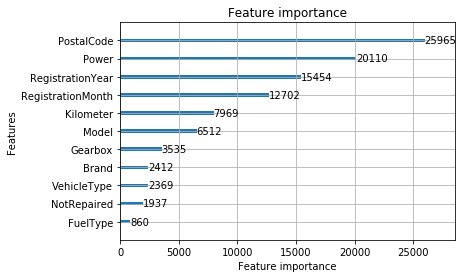

In [28]:
lgb.plot_importance(model_LGBMR)

<div class="alert alert-block alert-info">
    
Интересный график получился. Я полностью согласен с твоим предложением убрать PostalCode. Но интересно, что это оказался наиболее важный признак. В остальном для меня все логично
    
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Тут математика, не более того) Просто данный набор цифр оказался для используемых формул в м оделировании - интересным. В целом, тут вопрос вот в чём: сможем ли мы бизнесово объяснить этот набор цифр  (да и любой другой фактр в модели) для заказчика, а потом ещё и успешно использовать для моделирования? Если да, оставляем. Если не сможем - лучше удалять. На мой взгляд - данный фактор сложно понять с позиции бизнес-велью, поэтому удалили бы....<br>
    
А данный инструмент - реально очень интересен для работы.
    </div>

### Общий вывод

* Несмотря на то, что RMSE казалось довольно высокой, по каждой модели она в два раза ниже чем у простого алгоритма осреднения данных - 3528 евро
* Лучшей оказалась модель LGBMRegressor с результатом RMSE - 1318 евро
* Далее CatBoostRegressor - 1527 euro
* На третьем месте RandomForestRegressor - 1764 - модель без градиентного бустинга
* По времени все модели обучались почти одинаково - 1 минуту. Для этого специально были подобраны гиперпараметры

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Дмитрий, крепкая и чёткая работа!<br>
Прочитав её до конца хочется добавить: ..."А по сему и делу конец), как говорится" <br>
Мне было интерено двигаться от блока к блоку, читать размышления, код и выводы.<br>
При этом оформление выводов такое же последовательное и адекватное.<br>
В целом, ты не забыл поисследовать данные, и достаточно разносторонне поработать с моделями.<br>
    
<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br>  
    
2) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
 
Например, алгоритм такой может:<br>
а) анализ аномалий: количественные и категориальные переменные <br>
б) анализ пропусков: количественные и категориальные переменные<br>
в) проверка дубликатов<br>
г) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
    
3) Можно попробовать провести анализ остатков. Вычислить разницу между прогноз-факт и посмотерть что и как можедель чаще всего хорошо/плохо предсказывает.<br>
4) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, суперретро, старая, новаоя... надо пдумать..) ну и попробовать новую модель (этопросто на обчуждение). А может, по каждому кластеру - вообще своя модель...<br>
    
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>
Особо вопросов нет к проекту. Единственное - очень здорово будет, если найдёшь возможность сделать график важности факторов. Это необходимая вещь для финалной части любой модельной работы.<br>
<font color='green'>    
<br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!
    </div>

<div class="alert alert-block alert-info">
    
График добавил. Николай, спасибо за ревью!
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ОК, Дмитрий! Всё по делу. Постарался ещё раскрыть идею, как анализироыать фаткоры для модели.<br>
Cпасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!
    </div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей